<a href="https://colab.research.google.com/github/soufianeze/courses/blob/main/test_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importation library Pandas, Numpy, seaborn, matplotlib, preprocessing, f1_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import chi2_contingency
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score, precision_score
from sklearn import svm
from sklearn import neighbors
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
import xgboost as xgb

# myfunctions_eda : fichier.py EDA functions
from myfunctions_eda import open_df 
from myfunctions_ml import compare_models
from myfunctions_ml import train_and_evaluate
from myfunctions_eda import perform_eda

from myfunctions_smote import compare_models_sm
from myfunctions_smote import train_and_evaluate_sm

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from sklearn.decomposition import PCA
import xgboost as xgb

In [2]:
pd.set_option('display.max_column', 111)

In [3]:
# Chargement du fichier depuis le GITHUB
! wget https://raw.githubusercontent.com/soufianeze/courses/main/mcardio.csv

--2021-11-27 01:22:16--  https://raw.githubusercontent.com/soufianeze/courses/main/mcardio.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘mcardio.csv.2’

mcardio.csv.2       100%[===================>] 191.36K  --.-KB/s    in 0.02s   

2021-11-27 01:22:17 (7.56 MB/s) - ‘mcardio.csv.2’ saved [195955/195955]



In [4]:
open_df(path = "mcardio.csv")

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
df = open_df(path = "mcardio.csv")

-----------------------------------------------
1. TARGET VARIABLE : TenYearCHD
-----------------------------------------------
percentage of classes in TenYearCHD
0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64



-----------------------------------------------
(Test Chi2) between target and each quantitative variable
-----------------------------------------------



                      male  education  currentSmoker  BPMeds  prevalentStroke  \
Statistique de test  32.64       31.9           1.50   30.61            14.02   
P_Value               0.00        0.0           0.22    0.00             0.00   

                     prevalentHyp  diabetes  TenYearCHD  
Statistique de test        132.61     38.44     4230.24  
P_Value                      0.00      0.00        0.00  

-----------------------------------------------
Tableau de corrélation :


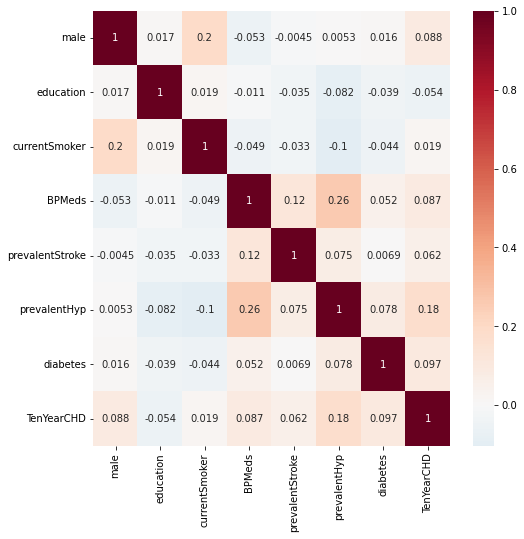

In [6]:
perform_eda(df = df, target_column = 'TenYearCHD')

In [7]:
#Impute missing values using Scikit-Learn(KNNImputer)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [8]:
# split data frame into X and y 
X = df[['male', 'age', 'cigsPerDay','totChol', 'sysBP', 'glucose', 'education','heartRate', 'BPMeds',
        'prevalentStroke','prevalentHyp', 'diabetes', 'diaBP', 'BMI']]
y = df['TenYearCHD']

In [9]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [10]:
# standardization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
compare_models(
    list_of_models = [DecisionTreeClassifier(), SVC(), LogisticRegression(), RandomForestClassifier(), xgb.XGBClassifier()],
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test,
    list_of_metrics = [f1_score, precision_score, recall_score, roc_auc_score]
)

,TRAIN_f1_score,TRAIN_precision_score,TRAIN_recall_score,TRAIN_roc_auc_score,TEST_f1_score,TEST_precision_score,TEST_recall_score,TEST_roc_auc_score
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.26,0.27,0.26,0.56
LogisticRegression,0.14,0.77,0.08,0.54,0.12,0.82,0.07,0.53
RandomForestClassifier,1.00,1.00,1.00,1.00,0.10,0.53,0.06,0.52
XGBClassifier,0.25,0.97,0.14,0.57,0.07,0.56,0.04,0.52
SVC,0.14,1.00,0.08,0.54,0.03,1.00,0.01,0.51


In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [13]:
X_smote, y_smote = SMOTE(sampling_strategy=0.90).fit_resample(X_train, y_train)

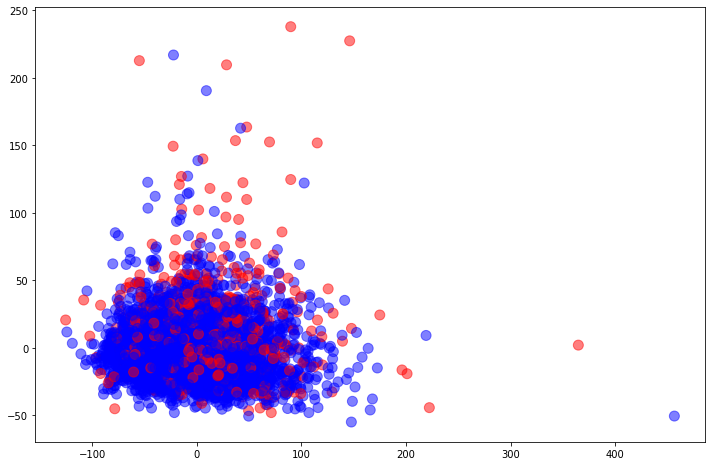

In [14]:
model = PCA(n_components=2)
model.fit(X)
x_pca = model.transform(X)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap= 'bwr', s=100, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


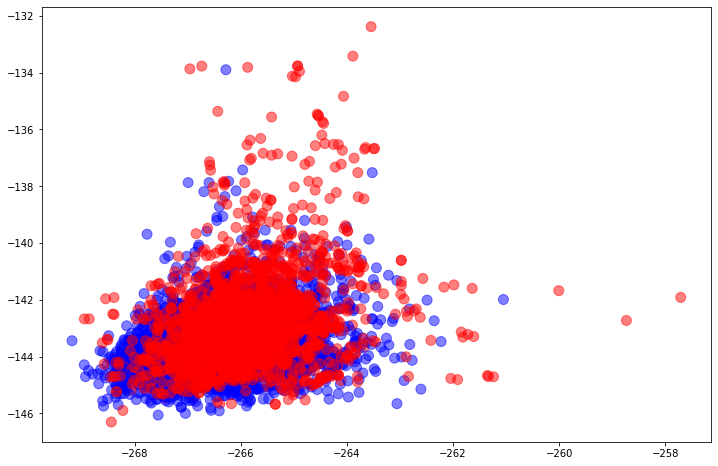

In [15]:
x_pca = model.transform(X_smote)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_smote, cmap= 'bwr', s=100, alpha=0.5)

In [16]:
compare_models(
    list_of_models = [DecisionTreeClassifier(), SVC(), LogisticRegression(), RandomForestClassifier(), xgb.XGBClassifier()],
    X_train = X_smote,
    X_test = X_test,
    y_train = y_smote,
    y_test = y_test,
    list_of_metrics = [f1_score, precision_score, recall_score, roc_auc_score]
)

,TRAIN_f1_score,TRAIN_precision_score,TRAIN_recall_score,TRAIN_roc_auc_score,TEST_f1_score,TEST_precision_score,TEST_recall_score,TEST_roc_auc_score
LogisticRegression,0.65,0.66,0.64,0.67,0.43,0.31,0.67,0.69
SVC,0.74,0.75,0.73,0.76,0.37,0.28,0.55,0.64
XGBClassifier,0.83,0.84,0.82,0.84,0.33,0.31,0.35,0.60
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.31,0.27,0.36,0.59
RandomForestClassifier,1.00,1.00,1.00,1.00,0.26,0.35,0.20,0.57
